In [1]:
import tensorflow as tf 


In [2]:
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage", 
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
68*32


2176

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 0])>>


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[112. 100. 110.]
  [108.  96. 106.]
  [104.  92. 102.]
  ...
  [100.  88.  92.]
  [ 97.  85.  89.]
  [ 93.  81.  85.]]

 [[102.  90. 100.]
  [102.  90. 100.]
  [104.  92. 102.]
  ...
  [ 92.  80.  84.]
  [ 89.  77.  81.]
  [ 87.  75.  79.]]

 [[101.  89.  99.]
  [104.  92. 102.]
  [108.  96. 106.]
  ...
  [ 89.  77.  81.]
  [ 90.  78.  82.]
  [ 92.  80.  84.]]

 ...

 [[156. 150. 162.]
  [158. 152. 164.]
  [159. 153. 165.]
  ...
  [152. 145. 152.]
  [151. 144. 151.]
  [150. 143. 150.]]

 [[154. 148. 160.]
  [156. 150. 162.]
  [156. 150. 162.]
  ...
  [149. 142. 149.]
  [149. 142. 149.]
  [149. 142. 149.]]

 [[152. 146. 158.]
  [153. 147. 159.]
  [151. 145. 157.]
  ...
  [146. 139. 146.]
  [146. 139. 146.]
  [147. 140. 147.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[129. 113. 124.]
  [106.  90. 101.]
  [122. 106. 116.]
  ...
  [186. 177. 180.]
  [184. 175. 178.]
  [181. 172. 175.]]

 [[131. 115. 126.]
  [115.  99. 110.]
  [124. 108. 118.]
  ...
  [191. 182. 185.]
  [189. 180. 183.]
  [187. 178. 181.]]

 [[131. 115. 125.]
  [123. 107. 117.]
  [127. 111. 121.]
  ...
  [192. 183. 186.]
  [191. 182. 185.]
  [190. 181. 184.]]

 ...

 [[134. 121. 130.]
  [139. 126. 135.]
  [142. 129. 138.]
  ...
  [178. 171. 179.]
  [173. 166. 174.]
  [172. 165. 173.]]

 [[137. 124. 133.]
  [143. 130. 139.]
  [147. 134. 143.]
  ...
  [176. 169. 177.]
  [174. 167. 175.]
  [178. 171. 179.]]

 [[131. 118. 127.]
  [138. 125. 134.]
  [142. 129. 138.]
  ...
  [162. 155. 163.]
  [165. 158. 166.]
  [175. 168. 176.]]]


In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


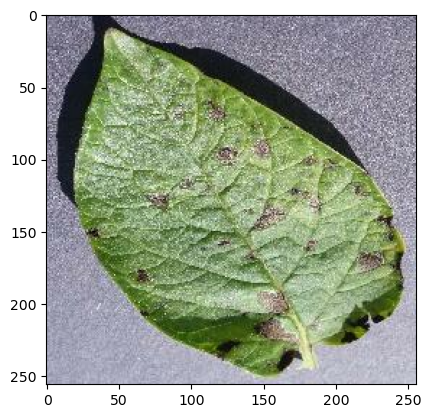

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

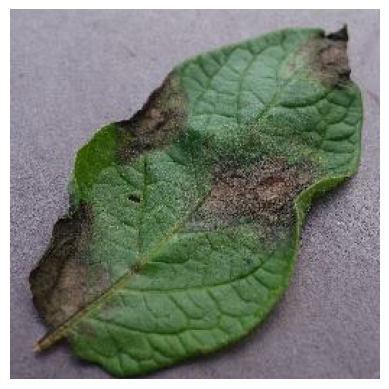

In [13]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

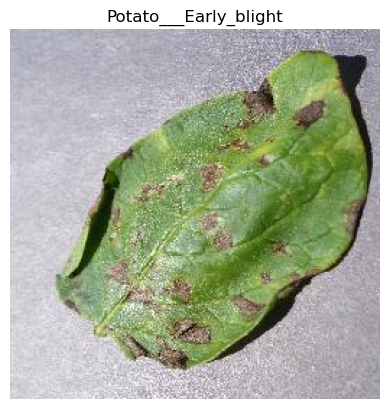

In [14]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

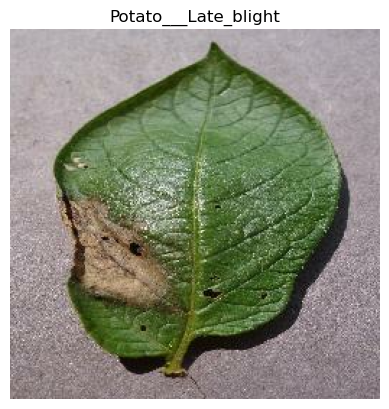

In [15]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

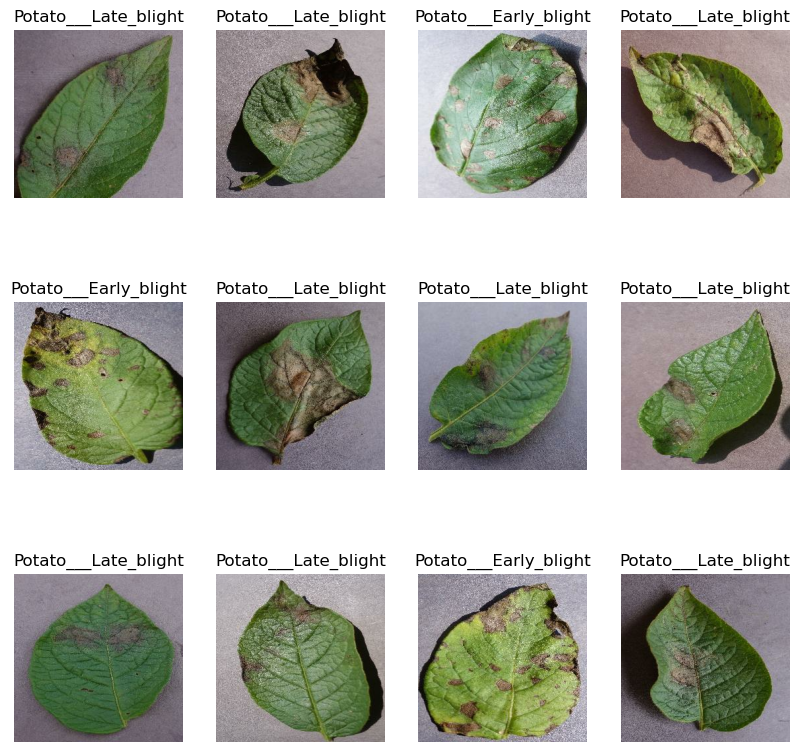

In [16]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [17]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [18]:
train_ds= dataset.take(54)
len(train_ds)

54

In [19]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [20]:
val_size =0.1
len(dataset)*val_size

6.800000000000001

In [21]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [22]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size =len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int (train_split*ds_size)
    val_size = int (val_split*ds_size)
    train_ds= ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds,test_ds

In [23]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

54

In [25]:
len(val_ds)

6

In [26]:
len(test_ds)

8

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [29]:
pip install tensorflow==<desired_version>


Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [30]:
from tensorflow.keras import layers


In [32]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])
